## Stock prices and News

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt

%matplotlib inline

In [2]:
import nltk
import wordcloud as wc

### 1. Retrieiving datasets

In [3]:
stocks=pd.read_csv("F:/PythonTraining/Python_CaseStudy/PCS_Kagle_StockNews/marketdata_sample.csv", sep=",")

In [4]:
stocks

,time,assetCode,assetName,universe,volume,close,open,returnsClosePrevRaw1,returnsOpenPrevRaw1,returnsClosePrevMktres1,returnsOpenPrevMktres1,returnsClosePrevRaw10,returnsOpenPrevRaw10,returnsClosePrevMktres10,returnsOpenPrevMktres10,returnsOpenNextMktres10
0,2007-02-01 22:00:00+00:00,A.N,Agilent Technologies Inc,1.0,2606900.0,32.19,32.17,0.005938,0.005312,NaN,NaN,-0.001860,0.000622,NaN,NaN,0.034672
1,2007-02-01 22:00:00+00:00,AAI.N,AirTran Holdings Inc,0.0,2051600.0,11.12,11.08,0.004517,-0.007168,NaN,NaN,-0.078708,-0.088066,NaN,NaN,0.027803
2,2007-02-01 22:00:00+00:00,AAP.N,Advance Auto Parts Inc,1.0,1164800.0,37.51,37.99,-0.011594,0.025648,NaN,NaN,0.014332,0.045405,NaN,NaN,0.024433
3,2007-02-01 22:00:00+00:00,AAPL.O,Apple Inc,1.0,23747329.0,84.74,86.23,-0.011548,0.016324,NaN,NaN,-0.048613,-0.037182,NaN,NaN,-0.007425
4,2007-02-01 22:00:00+00:00,ABB.N,ABB Ltd,1.0,1208600.0,18.02,18.01,0.011791,0.025043,NaN,NaN,0.012929,0.020397,NaN,NaN,-0.017994
5,2007-02-01 22:00:00+00:00,ABC.N,AmerisourceBergen Corp,1.0,1657300.0,52.37,52.40,-0.000191,0.008468,NaN,NaN,0.089000,0.077746,NaN,NaN,0.058680
6,2007-02-01 22:00:00+00:00,ABD.N,ACCO Brands Corp,0.0,1186200.0,23.63,24.13,-0.020721,-0.007404,NaN,NaN,0.005104,0.026809,NaN,NaN,-0.044285
7,2007-02-01 22:00:00+00:00,ABM.N,ABM Industries Inc,0.0,301200.0,26.19,25.90,0.013545,0.014890,NaN,NaN,0.068980,0.047311,NaN,NaN,0.016578
8,2007-02-01 22:00:00+00:00,ABT.N,Abbott Laboratories,1.0,5692300.0,52.87,52.50,-0.002453,-0.004739,NaN,NaN,0.001515,-0.004928,NaN,NaN,0.009861
9,2007-02-01 22:00:00+00:00,ABV.N,Companhia de Bebidas das Americas Ambev,1.0,401800.0,52.46,52.10,0.014112,0.024784,NaN,NaN,0.042321,0.027411,NaN,NaN,0.012917


In [5]:
stocks.columns

Index(['time', 'assetCode', 'assetName', 'universe', 'volume', 'close', 'open',
       'returnsClosePrevRaw1', 'returnsOpenPrevRaw1',
       'returnsClosePrevMktres1', 'returnsOpenPrevMktres1',
       'returnsClosePrevRaw10', 'returnsOpenPrevRaw10',
       'returnsClosePrevMktres10', 'returnsOpenPrevMktres10',
       'returnsOpenNextMktres10'],
      dtype='object')

In [6]:
news=pd.read_csv("F:/PythonTraining/Python_CaseStudy/PCS_Kagle_StockNews/news_sample.csv", sep=",")

In [7]:
news

,time,sourceTimestamp,firstCreated,sourceId,headline,urgency,takeSequence,provider,subjects,audiences,...,noveltyCount12H,noveltyCount24H,noveltyCount3D,noveltyCount5D,noveltyCount7D,volumeCounts12H,volumeCounts24H,volumeCounts3D,volumeCounts5D,volumeCounts7D
0,2007-01-01 04:29:32+00:00,2007-01-01 04:29:32+00:00,2007-01-01 04:29:32+00:00,e58c6279551b85cf,China's Daqing pumps 43.41 mln tonnes of oil i...,3,1,RTRS,"{'CRU', 'CN', 'RTRS', 'ENR', 'LEN', 'EMRG', 'N...","{'O', 'Z', 'OIL'}",...,0,0,0,0,0,0,0,3,6,7
1,2007-01-01 07:03:35+00:00,2007-01-01 07:03:34+00:00,2007-01-01 07:03:34+00:00,5a31c4327427f63f,"FEATURE-In kidnapping, finesse works best",3,1,RTRS,"{'BD', 'INS', 'LATAM', 'CA', 'US', 'MX', 'IL',...","{'PGE', 'PCU', 'PCO', 'DNP', 'MD', 'E', 'G', '...",...,1,1,1,1,1,1,1,3,3,3
2,2007-01-01 11:29:56+00:00,2007-01-01 11:29:56+00:00,2007-01-01 11:29:56+00:00,1cefd27a40fabdfe,PRESS DIGEST - Wall Street Journal - Jan 1,3,1,RTRS,"{'IQ', 'RO', 'US', 'ID', 'RET', 'RTRS', 'ENR',...","{'M', 'PMF', 'DNP', 'PTD', 'T', 'E', 'D', 'PSC...",...,0,0,0,0,0,0,0,5,11,17
3,2007-01-01 12:08:37+00:00,2007-01-01 12:08:37+00:00,2007-01-01 12:08:37+00:00,23768af19dc69992,PRESS DIGEST - New York Times - Jan 1,3,1,RTRS,"{'PUB', 'BUS', 'INS', 'CA', 'ENT', 'US', 'FIN'...","{'M', 'PMF', 'DNP', 'PTD', 'T', 'E', 'D', 'PSC...",...,0,0,0,0,0,0,0,5,13,15
4,2007-01-01 12:08:37+00:00,2007-01-01 12:08:37+00:00,2007-01-01 12:08:37+00:00,23768af19dc69992,PRESS DIGEST - New York Times - Jan 1,3,1,RTRS,"{'PUB', 'BUS', 'INS', 'CA', 'ENT', 'US', 'FIN'...","{'M', 'PMF', 'DNP', 'PTD', 'T', 'E', 'D', 'PSC...",...,0,0,0,0,0,0,0,0,0,0
5,2007-01-01 12:08:37+00:00,2007-01-01 12:08:37+00:00,2007-01-01 12:08:37+00:00,23768af19dc69992,PRESS DIGEST - New York Times - Jan 1,3,1,RTRS,"{'PUB', 'BUS', 'INS', 'CA', 'ENT', 'US', 'FIN'...","{'M', 'PMF', 'DNP', 'PTD', 'T', 'E', 'D', 'PSC...",...,0,0,0,0,0,0,0,0,2,3
6,2007-01-01 12:08:37+00:00,2007-01-01 12:08:37+00:00,2007-01-01 12:08:37+00:00,23768af19dc69992,PRESS DIGEST - New York Times - Jan 1,3,1,RTRS,"{'PUB', 'BUS', 'INS', 'CA', 'ENT', 'US', 'FIN'...","{'M', 'PMF', 'DNP', 'PTD', 'T', 'E', 'D', 'PSC...",...,0,0,0,0,0,0,0,2,8,8
7,2007-01-01 12:08:37+00:00,2007-01-01 12:08:37+00:00,2007-01-01 12:08:37+00:00,23768af19dc69992,PRESS DIGEST - New York Times - Jan 1,3,1,RTRS,"{'PUB', 'BUS', 'INS', 'CA', 'ENT', 'US', 'FIN'...","{'M', 'PMF', 'DNP', 'PTD', 'T', 'E', 'D', 'PSC...",...,0,0,0,0,0,0,0,0,4,16
8,2007-01-01 12:08:37+00:00,2007-01-01 12:08:37+00:00,2007-01-01 12:08:37+00:00,23768af19dc69992,PRESS DIGEST - New York Times - Jan 1,3,1,RTRS,"{'PUB', 'BUS', 'INS', 'CA', 'ENT', 'US', 'FIN'...","{'M', 'PMF', 'DNP', 'PTD', 'T', 'E', 'D', 'PSC...",...,0,0,0,0,0,0,2,8,11,12
9,2007-01-01 13:00:02+00:00,2007-01-01 13:00:02+00:00,2007-01-01 13:00:02+00:00,9fb959be43ed4ba2,Tenet Completes Sale of Alvarado Hospital Medi...,3,1,BSW,"{'US', 'NEWR', 'LEN', 'DRU'}","{'CNR', 'BSW'}",...,0,0,0,0,0,0,0,0,0,1


In [8]:
news.columns

Index(['time', 'sourceTimestamp', 'firstCreated', 'sourceId', 'headline',
       'urgency', 'takeSequence', 'provider', 'subjects', 'audiences',
       'bodySize', 'companyCount', 'headlineTag', 'marketCommentary',
       'sentenceCount', 'wordCount', 'assetCodes', 'assetName',
       'firstMentionSentence', 'relevance', 'sentimentClass',
       'sentimentNegative', 'sentimentNeutral', 'sentimentPositive',
       'sentimentWordCount', 'noveltyCount12H', 'noveltyCount24H',
       'noveltyCount3D', 'noveltyCount5D', 'noveltyCount7D', 'volumeCounts12H',
       'volumeCounts24H', 'volumeCounts3D', 'volumeCounts5D',
       'volumeCounts7D'],
      dtype='object')

### 2. Exploratory Analysis

### 2.1 News database text analysis

In [9]:
alltext=". ".join(news.headline)

In [10]:
nube1=wc.WordCloud().generate(alltext)

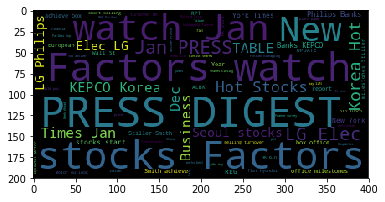

In [11]:
plt.imshow(nube1)

### 2.3 Merging both dataframes

#### 2.3.1 Transforming string format to date in news dataset

In [12]:
#Extracting just date from datetime
time2=[z[0:10] for z in news.time] 

#Creating a column in date format
lista1=list()
for z in time2:
    lista1.append(dt.datetime.strptime(z, "%Y-%m-%d"))
time2b=pd.DataFrame(lista1)
time2b=time2b.rename(columns={0:"time2"})

# Adding column to dataframe
news2=news.join(time2b)

#### 2.3.2 Transforming String format to date in stocks dataset

In [13]:
#Extracting just date from datetime
time2=[z[0:10] for z in stocks.time] 

#Creating a column in date format
lista2=list()
for z in time2:
    lista2.append(dt.datetime.strptime(z, "%Y-%m-%d"))
time2c=pd.DataFrame(lista2)
time2c=time2c.rename(columns={0:"time2"})

# Adding column to dataframe
stocks2=news.join(time2c)

#### 2.3.3 Joining dataframes

In [14]:
news3=news2.set_index("time")
stocks3=stocks2.set_index("time")
juntos=pd.merge(news3, stocks3, how="inner", left_index=True, right_index=True)

In [15]:
print("The shape of news3 is", news3.shape)
print("The shape of stocks3 is", stocks3.shape)
print("The shape of merged dataframe is", juntos.shape)

The shape of news3 is (100, 35)
The shape of stocks3 is (100, 35)
The shape of merged dataframe is (214, 70)


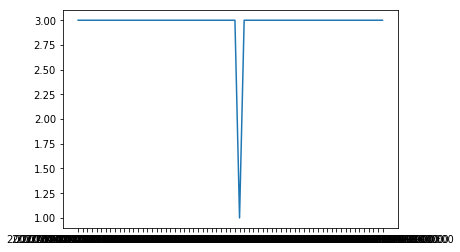

In [16]:
plt.plot(stocks3.urgency)

#### 2.3.4 Graphical data analysis

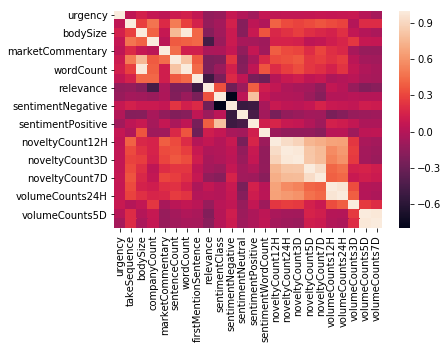

In [17]:
sns.heatmap(news2.corr())

In [29]:
aa=news["urgency"]
zz=list(zip(map(lambda a:a+a, aa)))
print(zz)

[(6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (2,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,), (6,)]


In [36]:
def square(aa):
    zz=aa
    zz=zz+2
    return zz

In [37]:
square(5)

7